Функція гіпотези лінійної регресії представляє собою передбачення моделі на основі вхідних даних і параметрів моделі (вагів). 
У векторному вигляді ця функція виражається як скалярний добуток вектора вагів і вектора ознак, плюс зміщення. 
Це можна записати таким чином:
$$ h(\vec{x}) = \vec{\omega}\times\vec{x}$$

функція для обчислення функції втрат у векторному вигляді:
$$
MSE = \frac{1}{n} \| \mathbf{y} - \hat{\mathbf{y}} \|^2
$$

In [72]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [73]:
X = np.array([[1, 2], [1, 3], [2, 4]])
y = np.array([3, 4, 5])               # Цільові значення

# model = LinearRegression()

# Створення моделі SGDRegressor
model = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, early_stopping=False)

# І ще це якийсь стохастичний підхід

model.fit(X, y)

# Отримання коефіціентів(ваг) і змішення:
omega = model.coef_
b = model.intercept_

print("Ваги моделі:", omega)
print("Зміщення моделі:", b)

"""Трішки не зрозумів що значить один крок"""

Ваги моделі: [0.15399485 0.3385847 ]
Зміщення моделі: [0.107295]


'Трішки не зрозумів що значить один крок'

In [79]:
file_path = "Housing.csv"
data = pd.read_csv(file_path)

print("Отсутствующие значения:")
print(data.isnull().sum())

X = data[['area', 'bedrooms', 'bathrooms']]  # ознаки
data['log_price'] = np.log(data['price'])
y = data['log_price']                            # цільова змінна

# Стовпці, що очікуються у цифровому вигляді
expected_numeric_cols = ['area', 'bedrooms', 'bathrooms']

# Перевіряємо та/чи замінюємо їх
for col in expected_numeric_cols:
    if data[col].apply(lambda x: isinstance(x, str) and not x.isdigit()).any():
        print(f"\nЗнайдені нечислові значення у {col}")
        data[col] = pd.to_numeric(data[col], errors="coerce").fillna(0)

# Обробка відсутніх значень
# Заповнення числових значень медіанними значеннями
for col in data.select_dtypes(include=["int", "float"]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Перевірка та видалення дублікатів
duplicates = data.duplicated().sum()
if duplicates:
    print("\nВидалення дублікатів...")
    data.drop_duplicates(inplace=True)

# Перевірка на аномальні значення в числових стовпцях
for col in data.select_dtypes(include=["int", "float"]).columns:
    if (data[col] < 0).any():
        print(f"\nЗнайдено нереалістичні значення у стовпці {col}")
        median = data[col].median()
        data[col] = data[col].apply(lambda x: median if x < 0 else x)

print("\nОсновні статистичні характеристики після очищення:")
print(data.describe())

Отсутствующие значения:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Основні статистичні характеристики після очищення:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.00

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Масштабування признаків
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення та навчання моделі Ridge регресії
#ridge_cv = RidgeCV(alphas=[9.0, 10.0, 12.0])
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train_scaled, y_train)

# Оцінка моделі
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ваги моделі Ridge (w):", ridge_cv.coef_)
print("Зсув моделі Ridge (b):", ridge_cv.intercept_)
print("Alpha:", ridge_cv.alpha_)
print("Середньоквадратична помилка (MSE) для Ridge:", mse_ridge)

Ваги моделі Ridge (w): [0.15727612 0.0639526  0.12863866]
Зсув моделі Ridge (b): 15.304745986248106
Alpha: 10.0
Середньоквадратична помилка (MSE) для Ridge: 0.06842698782438111


In [81]:
# Створення та навчання моделі Lasso регресії
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1])
lasso_model.fit(X_train_scaled, y_train)

# Оцінка моделі
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ваги моделі Lasso (w):", lasso_model.coef_)
print("Зсув моделі Lasso (b):", lasso_model.intercept_)
print("Середньоквадратична помилка (MSE) для Lasso:", mse_lasso)

Ваги моделі Lasso (w): [0.08278599 0.         0.07075378]
Зсув моделі Lasso (b): 15.304745986248106
Середньоквадратична помилка (MSE) для Lasso: 0.09050348387663665


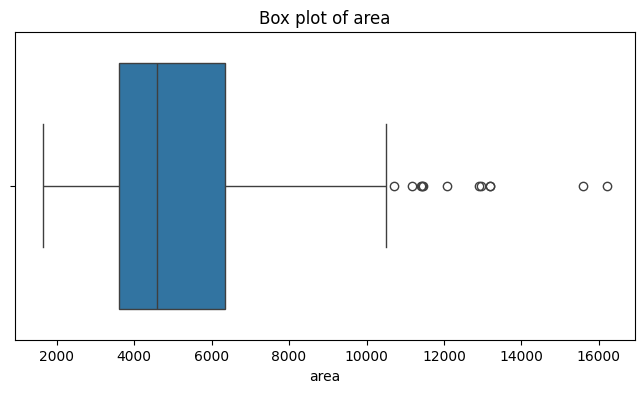

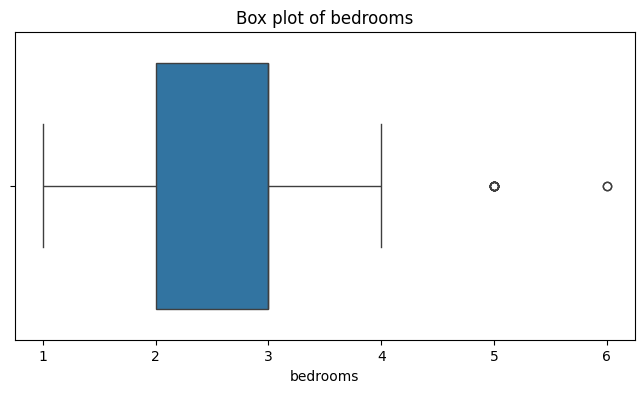

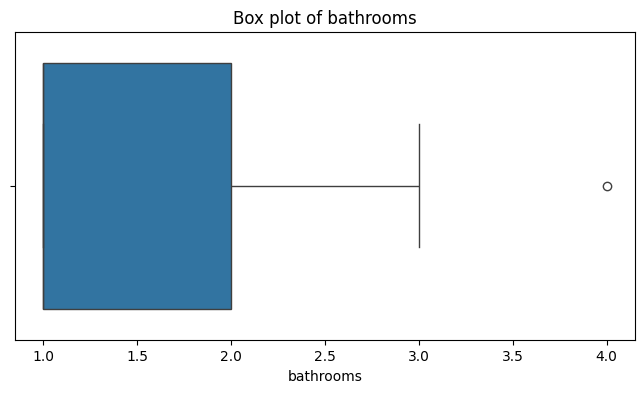

Индексы выбросов в целевой переменной: []


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Диаграммы размаха для каждого признака
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Вычисление Z-оценок для целевой переменной
z_scores = np.abs(stats.zscore(y))
threshold = 3
outliers = np.where(z_scores > threshold)

# Вывод индексов выбросов
print("Индексы выбросов в целевой переменной:", outliers[0])

In [84]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_scaled_manual = (X_train - X_train_mean) / X_train_std

X_train_scaled_manual = np.hstack([np.ones((X_train_scaled_manual.shape[0], 1)), X_train_scaled_manual])

alpha = 10.0  # alpha в RidgeCV
I = np.eye(X_train_scaled_manual.shape[1])
w_ridge_analytical = np.linalg.inv(X_train_scaled_manual.T @ X_train_scaled_manual + alpha * I) @ X_train_scaled_manual.T @ y_train

w_ridge_analytical

array([14.96159025,  0.15727612,  0.0639526 ,  0.12863866])

In [93]:
print("Ваги моделі Ridge (w):", ridge_cv.coef_)
print("Зсув моделі Ridge (b):", ridge_cv.intercept_)
print("Alpha:", ridge_cv.alpha_)
print("Середньоквадратична помилка (MSE) для Ridge:", mse_ridge)

print("\nЗначення вагів і перехоплення: ", w_ridge_analytical)

Ваги моделі Ridge (w): [0.15727612 0.0639526  0.12863866]
Зсув моделі Ridge (b): 15.304745986248106
Alpha: 10.0
Середньоквадратична помилка (MSE) для Ridge: 0.06842698782438111

Значення вагів і перехоплення:  [14.96159025  0.15727612  0.0639526   0.12863866]
